# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.002
-0.002
-0.003
-0.003
-0.004
-0.002
-0.003
-0.003
-0.002
0.968
0.97
0.972
0.971
0.971
1.954
1.957
1.959
1.958
1.958
2.947
2.949
2.951
2.951
2.95
3.945
3.945
3.944
3.944
4.93
4.933
4.935
4.933
4.933
4.933
5.927
5.927
6.65
6.65
6.65
6.65
7.37
7.372
7.373
7.373
7.373
8.359
8.362
8.365
8.364
8.363
9.345
9.35
9.35
9.35
9.35
10.342
10.342
10.341
10.343
11.324
11.327
11.329
11.327
11.327
12.313
12.315
12.318
12.316
12.316
13.304
13.309
13.309
13.307
13.308
14.298
14.301
14.302
14.302
14.791
14.794
14.796
14.795
14.795
15.295
15.3
15.299
15.298
15.297
16.289
16.289
16.288
16.288
17.281
17.281
17.281
17.28
18.27
18.27
18.269
18.269
19.261
19.261
19.261
19.26
19.26
20.248
20.251
20.25
20.25
21.239
21.239
21.237
21.238
21.99
21.99
21.989
21.989
22.744
22.744
22.742
22.742
23.729
23.729
23.728
23.727
24.704
24.704
24.703
24.703
25.693
25.691
25.691
25.

57.878
57.877
57.877
57.877
57.877
57.877
57.895
57.895
57.895
57.895
57.895
57.895
57.895
57.894
57.893
57.896
57.896
57.895
57.895
57.894
57.894
57.894
57.893
57.893
57.893
57.893
57.893
57.893
57.892
57.892
57.892
57.892
57.892
57.892
57.892
57.891
57.891
57.891
57.89
57.89
57.89
57.89
57.89
57.89
57.89
57.89
57.89
57.89
57.888
57.888
57.888
57.888
57.888
58.045
58.078
58.111
58.144
58.144
58.143
58.143
58.143
58.143
58.143
58.142
58.142
58.142
58.142
58.142
58.141
58.141
58.141
58.149
58.149
58.15
58.15
58.15
58.15
58.15
58.15
58.15
58.15
58.149
58.149
58.149
58.149
58.149
58.149
58.149
58.149
58.149
58.149
58.149
58.149
58.148
58.148
58.148
58.148
58.148
58.148
58.148
58.148
58.145
58.145
58.145
58.145
58.145
58.174
58.207
58.24
58.24
58.238
58.239
58.239
58.239
58.238
58.251
58.251
58.251
58.251
58.251
58.251
58.251
58.251
58.251
58.249
58.253
58.252
58.251
58.251
58.251
58.251
58.251
58.25
58.25
58.25
58.25
58.25
58.249
58.249
58.249
58.249
58.248
58.248
58.248
58.248
58.248
58.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1561,3122,59.667
1562,3124,59.667
1563,3126,59.666
1564,3128,59.666


<IPython.core.display.Javascript object>


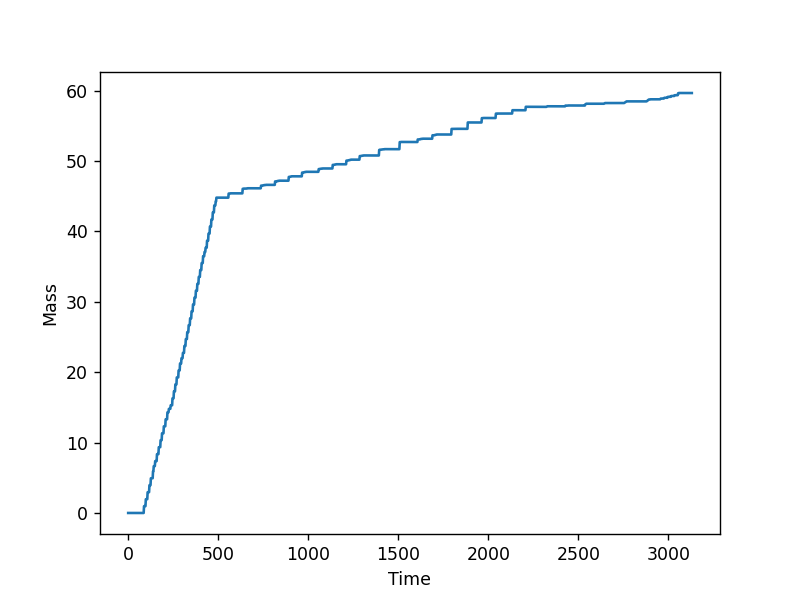

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_200323_S187-192.csv')